# Exploriatory Data Alanysis
## Project Type- EDA on google playstore

### Contribution- Mubashir Rasool

## Project Summary
The mobile application ecosystem has become one of the fastest-growing digital markets, with millions of apps available across categories such as games, education, business, lifestyle, health, and productivity. Among all platforms, the Google Play Store holds a dominant position as it caters to billions of Android users worldwide. With such diversity and scale, understanding the factors that contribute to an app’s success is essential for developers, businesses, and researchers. This project focuses on performing Exploratory Data Analysis (EDA) on Google Play Store apps to uncover meaningful patterns, trends, and insights that can guide app development and marketing strategies.

The dataset used for this study contains comprehensive information about mobile applications published on the Play Store, including attributes such as app name, category, ratings, reviews, size, installs, type (free or paid), price, content rating, and genres. Additionally, user feedback and update information provide a broader understanding of app performance and longevity. By conducting systematic analysis on this dataset, the project aims to answer critical questions such as: What types of apps are most popular among users? Do free apps dominate over paid ones? How do app ratings and reviews correlate with the number of installs? Which categories generate the highest user engagement?



Github Link

# About Dataset

- Description

This data set was downloaded from AlmaBetter capstone projects section.
- context --

while many public datasets (on kaggle ans like) Apple playstore data there are not many counterpart datasets available for Google palystore apps anywhere on the web. The dataset provides insights into apps available on the Google Play Store, including categories, ratings, installs, reviews, and other features, which are analyzed using EDA techniques

### Problem Statement


The Google Play Store hosts millions of apps, making it difficult for developers and businesses to identify the factors that drive app success. With so much data available—such as ratings, reviews, installs, and pricing—there is often little structured analysis to reveal clear patterns. Key questions remain unanswered: Which categories dominate the market? Do free apps perform better than paid ones? How do reviews, ratings, and app size affect user adoption?

This project addresses the lack of exploratory analysis on Play Store data by uncovering trends, correlations, and insights that can guide developers and businesses in making data-driven decisions in the highly competitive app market.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

# 2.  **Dataset Loading and Exploration | cleaning**
 ↪ Load the csv file with pandas

 ↪ Creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and incorrect records

- Lets load the csv file

In [2]:

df = pd.read_csv('googleplaystore.csv')

-  Viewing the first five rows

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [4]:
# Set options to be maximum rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

- Let's see the exact column names which can be easily copied later on from Google playstore Dataset

In [5]:
print(f"The names of the columns in the dataset are : {df.columns}")

The names of the columns in the dataset are : Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
print(f"The number of Rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of Rows are 10841, and columns are 13


- Let's have a look on the shape of the of the dataset

In [7]:
df.shape

(10841, 13)

Not enough, let's have a look in the columns and their data types using info fucntion

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [9]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the Size column first

In [10]:
# checking for null values
df['Size'].isnull().sum()

np.int64(0)

- No null values, we are good to go.

In [11]:
# checking for unique values
df['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Obeservation
-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

In [12]:
#  Find the values in Size column having 'M' in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [13]:
#  Find the values in size column  having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [14]:
#  Find the values in size column having 'varies with device'  in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [15]:
# Total Values in Size column
df['Size'].value_counts().sum()

np.int64(10841)

In [16]:
# Taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [17]:
# Convert the size column to numeric by multplying the values with M and K to 1024*1024 and 1024 respectively
# this function will convert the size column to numeric

#  lets define a functction

def convert_size(size):
    #  adding function details 
    ''' This function converts the size column to numeric by multplying the values with M and K to 1024*1024 and 1024 respectively
    '''

    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k','')) * 1024
        elif 'M' in size:
            return float(size.replace('M','')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)


In [18]:
#  rename the name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size':'Size_in_bytes'}, inplace=True)

In [19]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [20]:
#  check the unique value in installs column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
# Lets have a values counts of the installs column
df['Installs'].value_counts()


Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [22]:
# Find how many valuess has '+' in them
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [23]:
#  Total values in installs column
df['Installs'].value_counts().sum()

np.int64(10841)

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- No missing values in Installs we are good to go 
- The only problem in installs is to replace + sign  and comma .

In [24]:
#  Removong + sign from the installs column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)

#  Removing , comma from the installs column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

#  Converting the installs column to integer because this is the number of installs/counts
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed


In [25]:
df.head()  # check the head of dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [26]:
# check the datatype of the  installs column
df['Installs'].dtype

dtype('int64')

- We will generate a new columns based in the installations values, which will be helpful in our analysis

In [27]:
df['Installs'].max() # This will show the value counts of the column


np.int64(1000000000)

In [28]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [29]:
df['Installs_category'].value_counts()  # check the value counts of the new column

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

### Price Column
- Let's have a look in the price column

In [30]:
#  check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [31]:
df['Price'].isnull().sum()

np.int64(0)

- No null values

In [32]:
#  check the value counts of the price column
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

- We need to confirm if the values in the price column are only with $ sign or not

In [33]:
#  Lets see how many values have $ sign in them
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [34]:
#  This code counts the number of values in the 'Price' column that contain 0  but does not contan $ sign
df['Price'].loc[df['Price'].str.contains('0') & ~df['Price'].str.contains('\$')].value_counts().sum()

np.int64(10041)

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [35]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)

# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [36]:
df['Price'].dtype # check the datatype of the price column

dtype('float64')

In [37]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


### **2.1. Descriptive Statistics**

In [38]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Missing Values inside the data frame

In [39]:
# finding missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [40]:
#  Finding missing value percentage in the data
round(df.isnull().sum()/len(df) * 100, 2).sort_values(ascending=False)

Size_in_bytes        15.64
Size_in_Mb           15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
Category              0.01
Genres                0.01
Installs              0.00
App                   0.00
Reviews               0.00
Last Updated          0.00
Content Rating        0.00
Price                 0.00
Installs_category     0.00
dtype: float64

In [41]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(4877)

<Axes: >

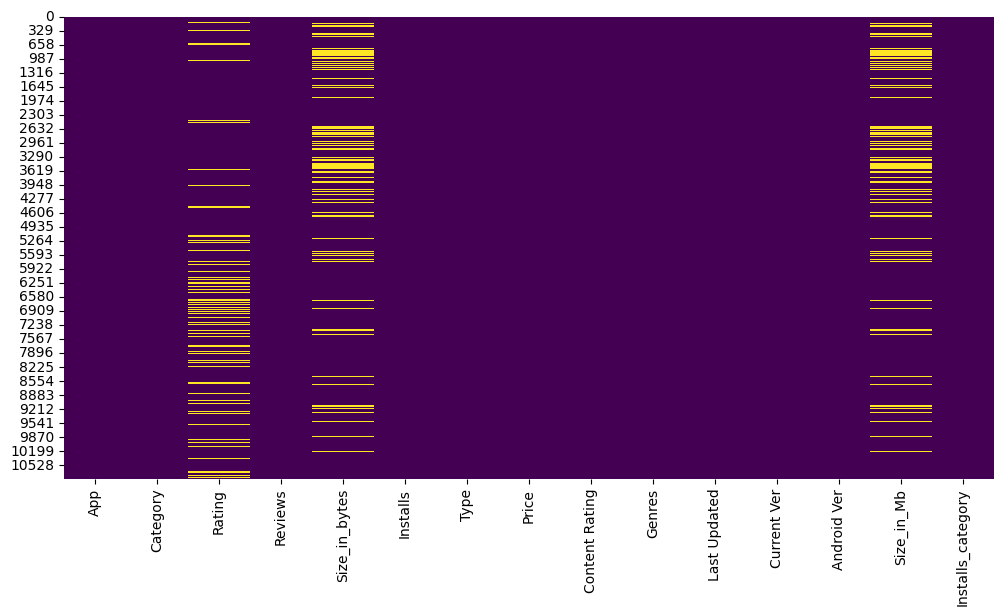

In [42]:
# plot missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar = False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each column')

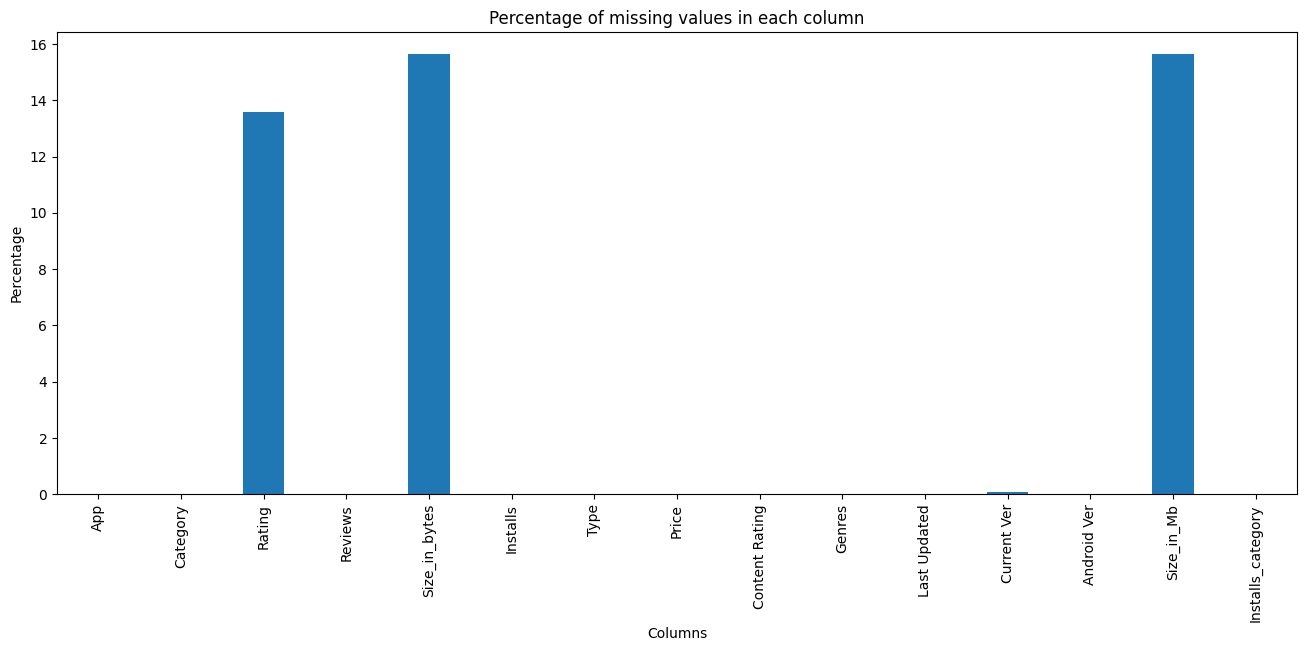

In [43]:
# Make figure size
plt.figure(figsize=(16, 6))
#  Plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar' )
#  Add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

- Let's plot the missing values other than 'Rating,' Size_in_bytes'  and  'Size_in_Mb' column
- We have missing percetnage columns other than rating having less than one percent of missing values, we will plot them as follws

Text(0.5, 1.0, 'Percentage of missing values in each column without Rating column')

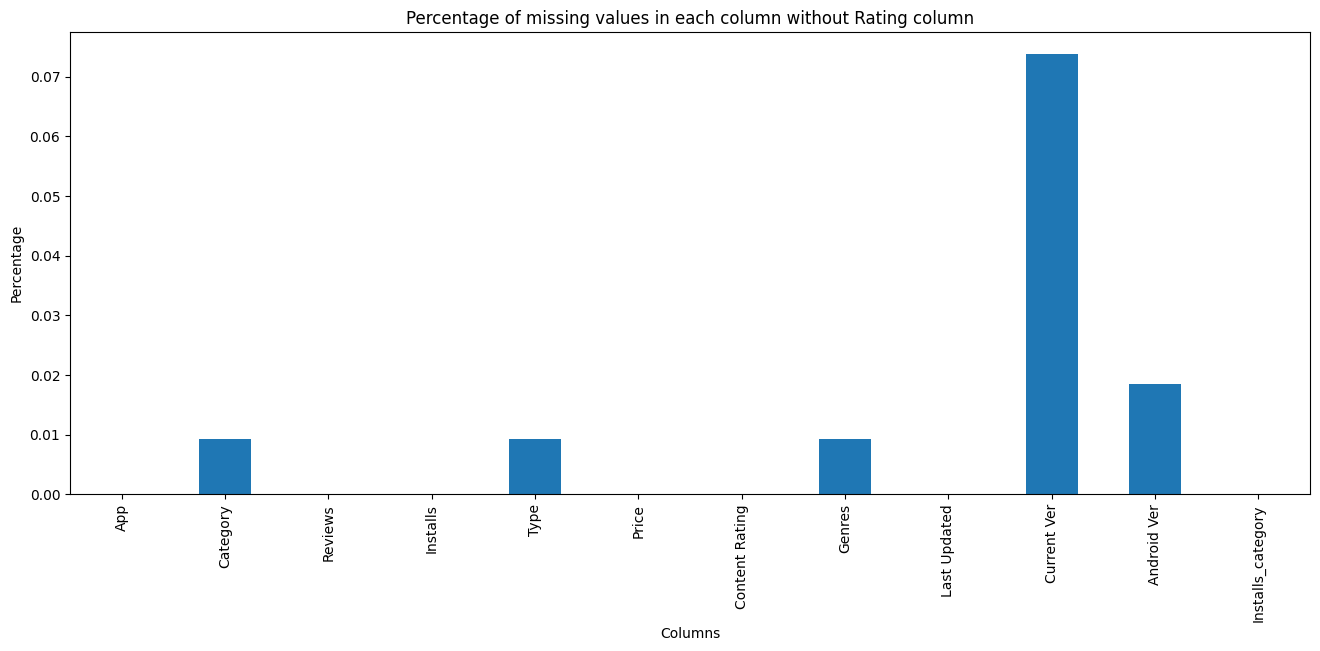

In [44]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar')  # plot the null values by their percentage in each column which are less than 1%
plt.xlabel('Columns')  # add x-axis label
plt.ylabel('Percentage')  # add y-axis label
plt.title('Percentage of missing values in each column without Rating column')  # add the title for the plot


In [45]:
df.isnull().sum().sort_values(ascending=False) # this will show the null values of each column in ascending order


Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [46]:
(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False) # this will show the null values of each column in ascending order with their percentage    


Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64

## Observations
---
- We have 1695 missing values in the `'Size_in_bytes'` and  `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column , which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---


- Let's run the correlations

In [47]:
df.describe()  # these are numeric columns


,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

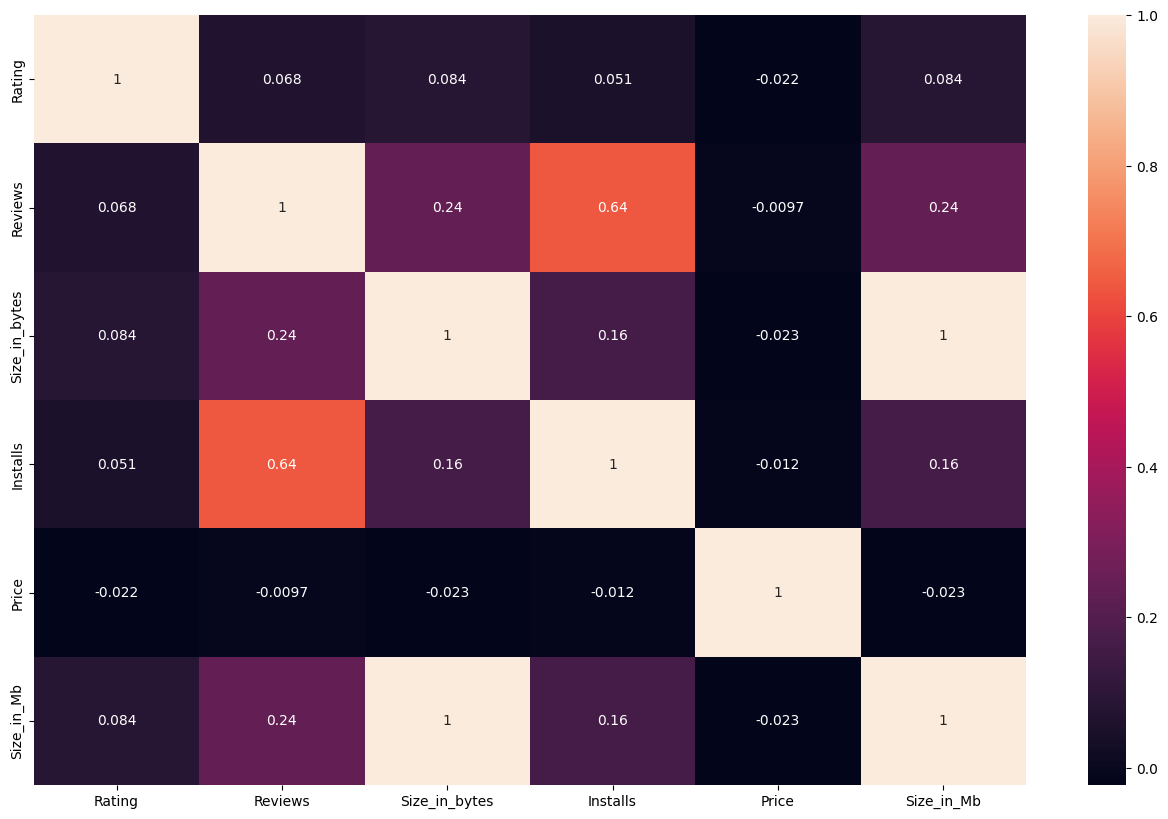

In [48]:
#  Make a correlations matris of numeric columns
plt.figure(figsize=(16, 10)) # make a figure size
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']  # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True, )  # plot the heatmap

In [49]:
#  we can also calculate the correlations using pandas
df[numeric_cols].corr() # this will show the correlation matrix 


,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [50]:
#  We can calculate the person correlation using scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate person's R)
df_clean = df.dropna()

# calculate person's R between Rating and Installs
pearson_r,  _ = stats.pearsonr(df_clean['Rating'], df_clean['Installs'])
print(f"Person's R between Rating and Installs: {pearson_r:.4f}")

Person's R between Rating and Installs: 0.0527


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [51]:
#  length before removing null values
print(f"Length of dataframe before removing null values: {len(df)}")

Length of dataframe before removing null values: 10841


In [52]:
#  remove the rows having null values in the 'Current Ver' 'Andriod Ver' 'Category' 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [53]:
#  Length after removing null values
print(f"Length of dataframe after removing null values: {len(df)}")

Length of dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [54]:
# Let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [55]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [56]:
#  Use a goruby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [57]:
df['Rating'].isnull().sum()

np.int64(1469)

In [58]:
# In which install_category the Rating has NaN values
df["Installs_category"].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

- Lets plot this and have a look

Text(7, 3.5, 'Null values: 0')

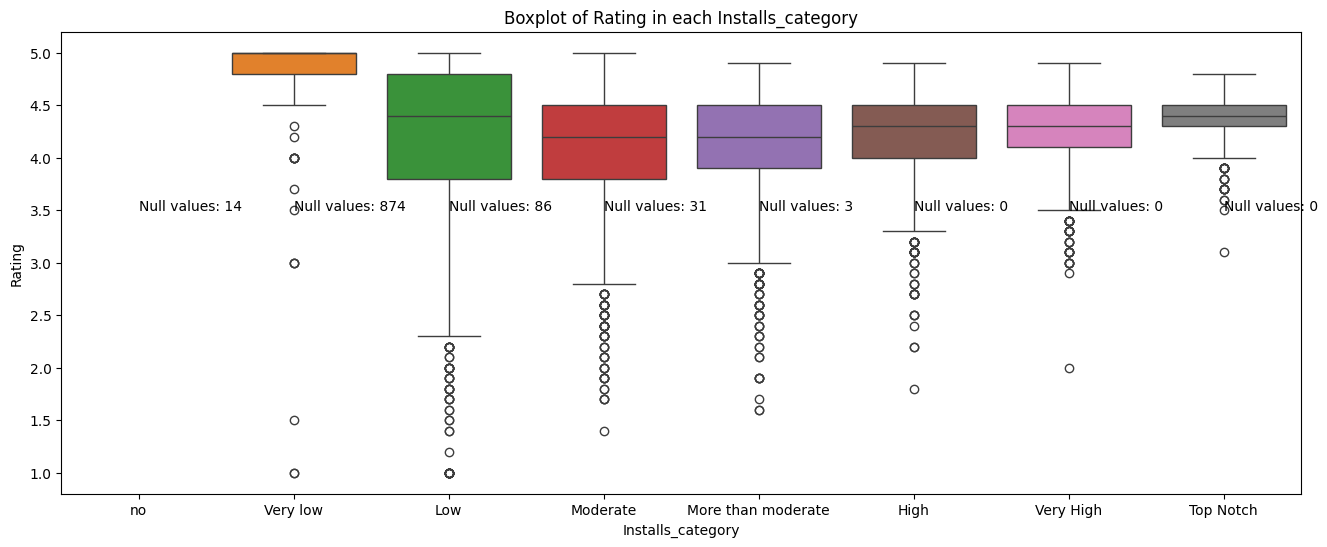

In [59]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6))  # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df)  # plot the boxplot
plt.title('Boxplot of Rating in each Installs_category')  # add title
#  add the text of number of null values in each category
plt.text(0, 3.5,'Null values: 14')
plt.text(1, 3.5,'Null values: 874')
plt.text(2, 3.5,'Null values: 86')
plt.text(3, 3.5,'Null values: 31')
plt.text(4, 3.5,'Null values: 3')
plt.text(5, 3.5,'Null values: 0')
plt.text(6, 3.5,'Null values: 0')
plt.text(7, 3.5,'Null values: 0')


- Let's check if there is any similar link with reviews as well

In [60]:
# In which Installs_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Rviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

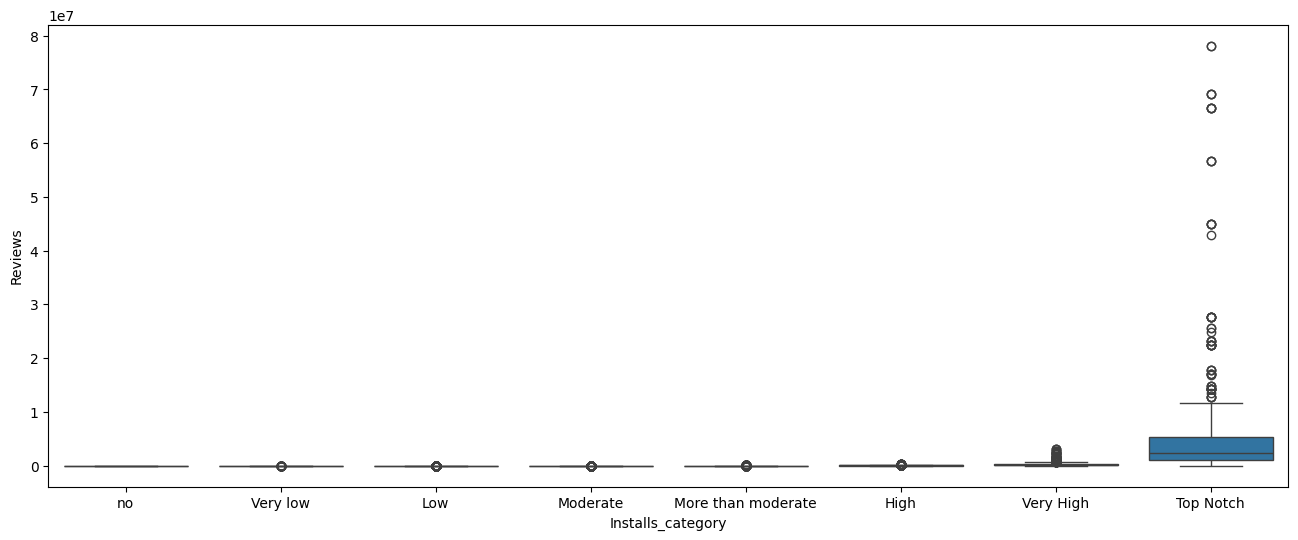

In [61]:
# Let's plpt the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x = 'Installs_category', y = 'Reviews', data=df)  # plot the boxplot


- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

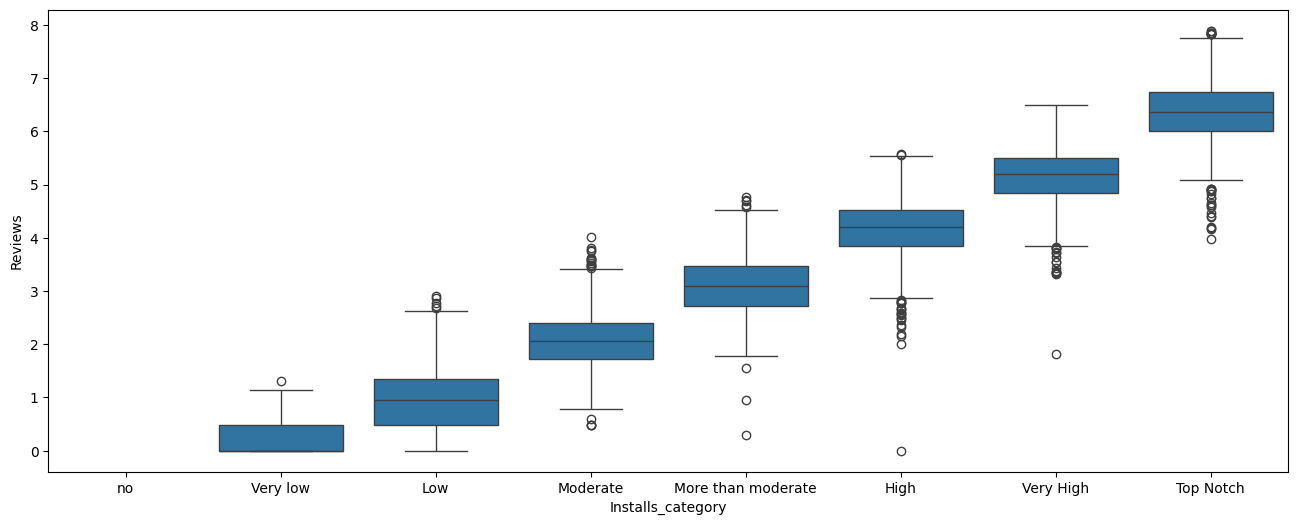

In [62]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16,6))
sns.boxplot(x = 'Installs_category', y = np.log10(df['Reviews']), data = df)

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

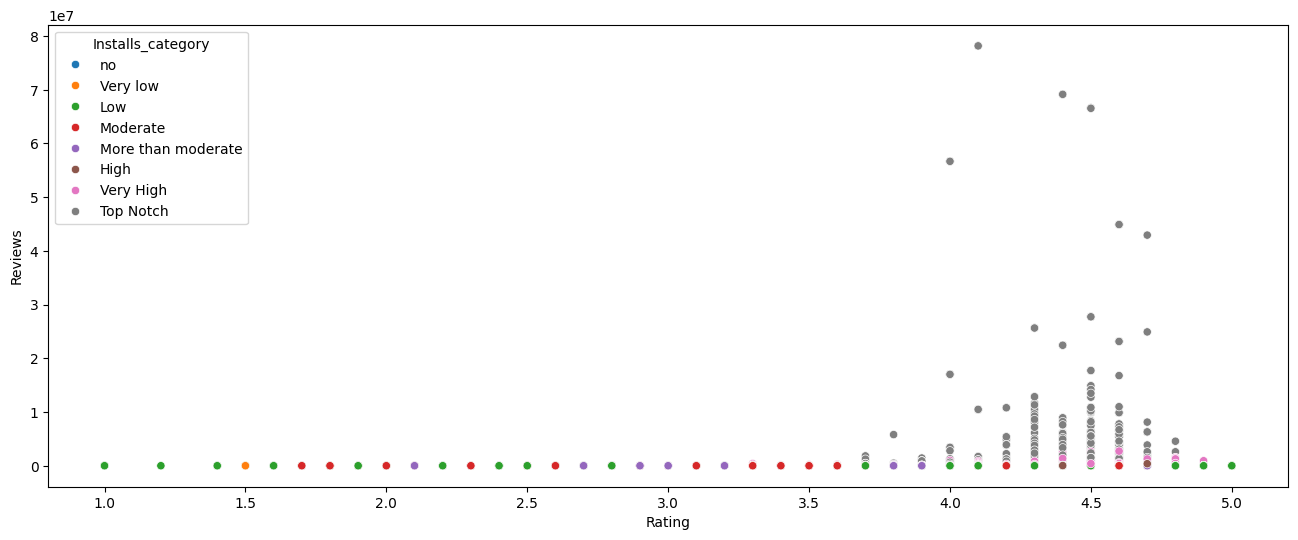

In [63]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

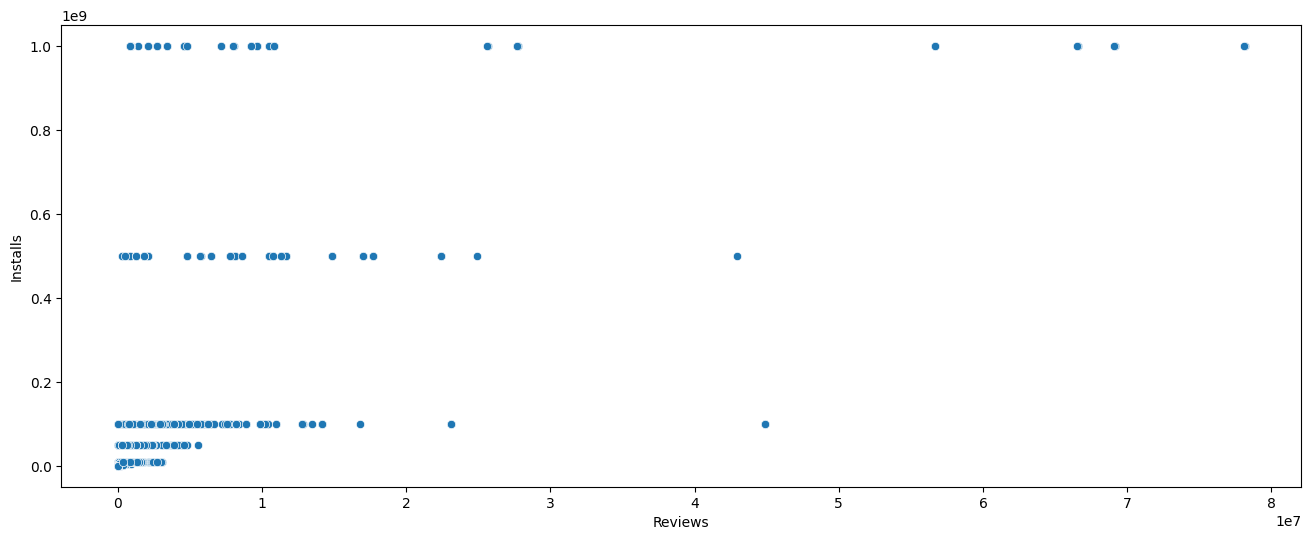

In [64]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

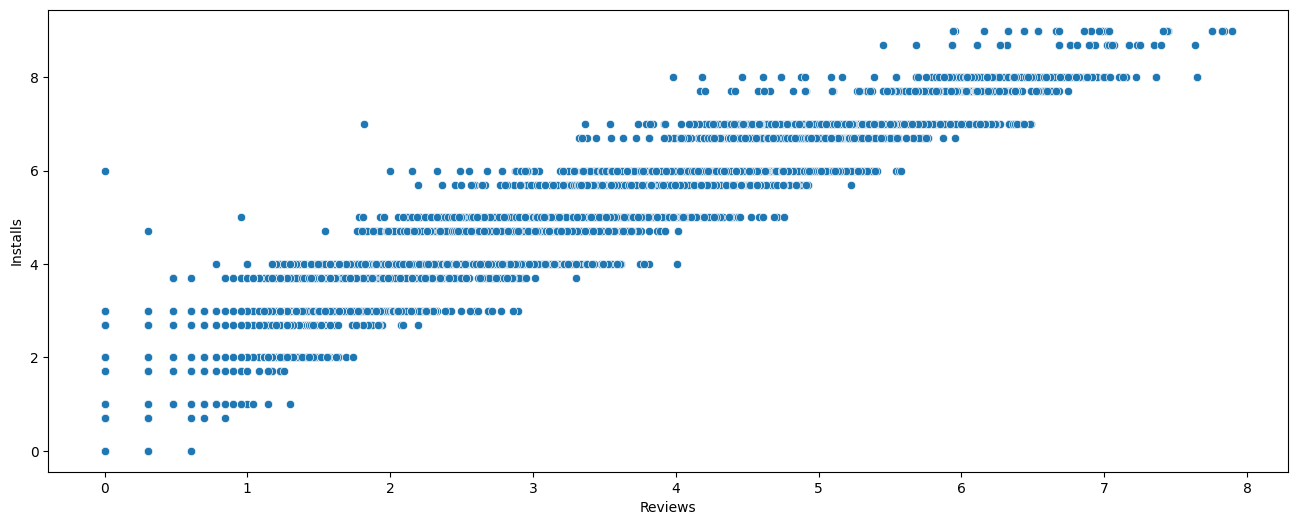

In [65]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

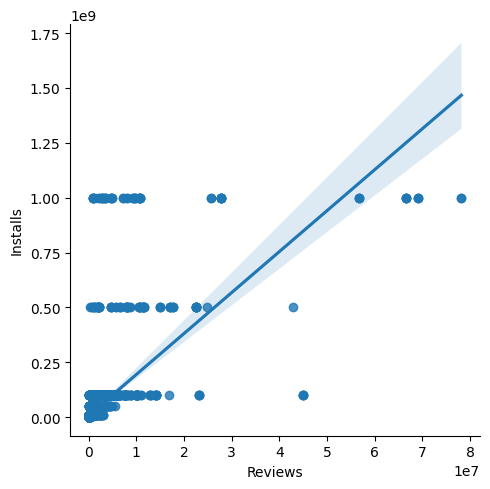

In [66]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [67]:
# find the duplicate if any
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [68]:
# find duplcaites if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we hvae 1181 duplicate app names
- Can we find a column which can help us to remove the duplicates?

Let's check for number of duplicates in each column using a for loop and printing the output

In [69]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()} ")

Number of duplicates in App column are: 1181 
Number of duplicates in Category column are: 10796 
Number of duplicates in Rating column are: 10789 
Number of duplicates in Reviews column are: 4830 
Number of duplicates in Size_in_bytes column are: 10373 
Number of duplicates in Installs column are: 10809 
Number of duplicates in Type column are: 10827 
Number of duplicates in Price column are: 10737 
Number of duplicates in Content Rating column are: 10823 
Number of duplicates in Genres column are: 10710 
Number of duplicates in Last Updated column are: 9453 
Number of duplicates in Current Ver column are: 7998 
Number of duplicates in Android Ver column are: 10796 
Number of duplicates in Size_in_Mb column are: 10373 
Number of duplicates in Installs_category column are: 10821 


This means that the only better way to find the duplicates is to check for whole data

In [70]:
# print the number of duplicates in df
print(f"Total number of duplicates in the dataframe are: {df.duplicated().sum()}")  

Total number of duplicates in the dataframe are: 483


- Find and watch all duplicates if they are real!

In [71]:
# find exact duplicates and print them
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Remove Duplicates

In [72]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [73]:
#  print the number of rows and columns after removing dupicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [74]:
#  which category has the highest number of apps
df['Category'].value_counts().head(10)   # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [75]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [76]:
#  category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **3.4. Which category has the highest rating?**

In [77]:
#  category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

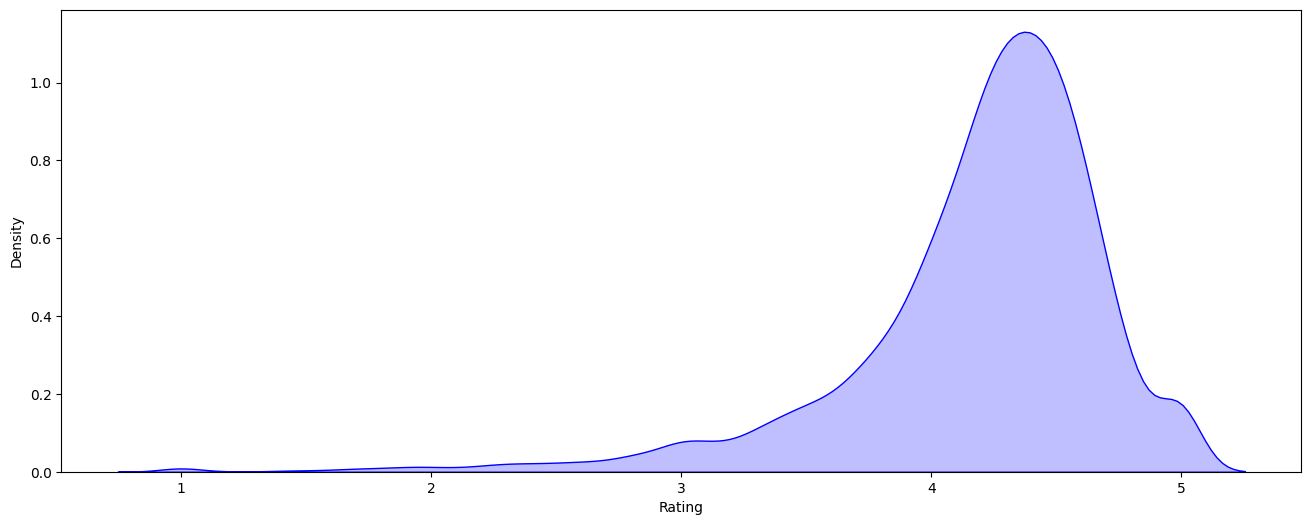

In [78]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

# **3.5. Which category has the highest percentage of paid apps?**


In [79]:
# Which category has the highest percentage of paid apps?
category_paid_percentage = df[df['Type'] == 'Paid'].groupby('Category').size() / df.groupby('Category').size() * 100
category_paid_percentage = category_paid_percentage.sort_values(ascending=False)
category_paid_percentage.head(10)

Category
PERSONALIZATION        20.984456
MEDICAL                20.588235
BOOKS_AND_REFERENCE    12.227074
WEATHER                 9.756098
FAMILY                  9.592573
TOOLS                   9.155767
GAME                    7.404103
COMMUNICATION           7.377049
PRODUCTIVITY            6.879607
SPORTS                  6.837607
dtype: float64

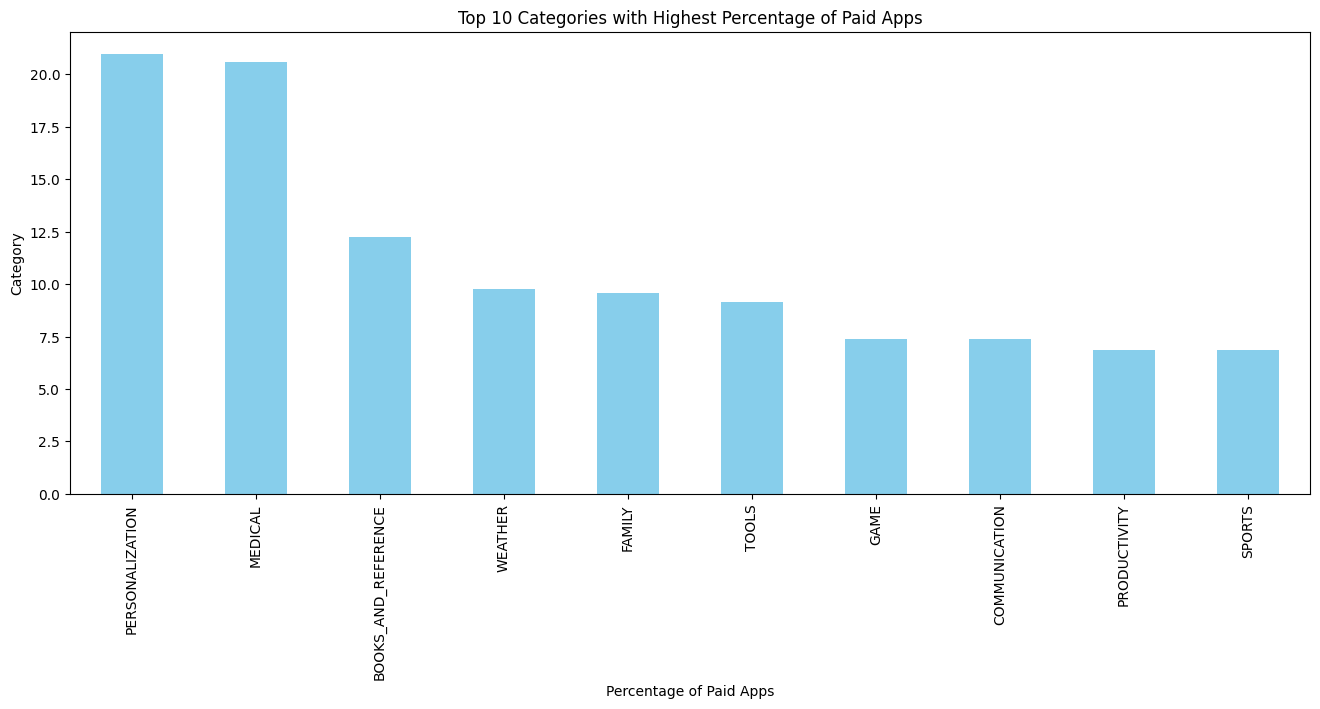

In [80]:
#  creating horizontal bar plot for the above data
plt.figure(figsize=(16, 6)) # make figure size
category_paid_percentage.head(10).plot(kind='bar', color='skyblue') #
plt.xlabel('Percentage of Paid Apps')  # add x-axis label
plt.ylabel('Category')  # add y-axis label
plt.title('Top 10 Categories with Highest Percentage of Paid Apps')  # add title
plt.show()

# **3.6. Which category has the highest number of installs free vs paid apps?**

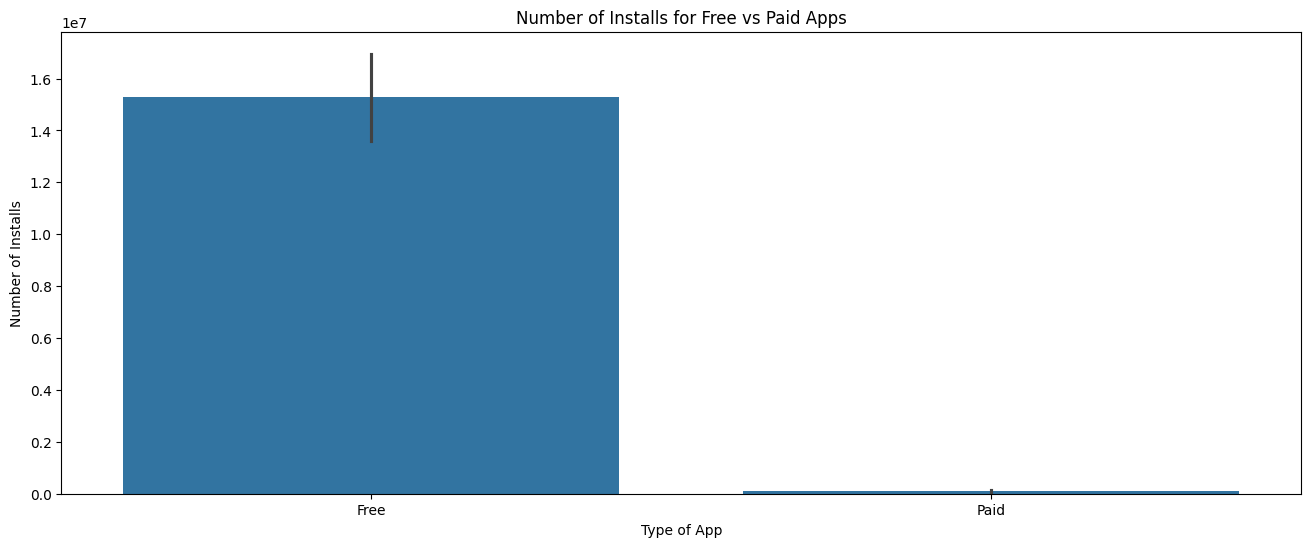

In [81]:
#  plot the installs for free vs paid apps make a bar plot 
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot
plt.xlabel('Type of App')  # add x-axis label
plt.ylabel('Number of Installs')  # add y-axis label
plt.title('Number of Installs for Free vs Paid Apps')  # add title
plt.show()

# **3.7. Which content rating is most popular in installs?**

In [82]:
#  which content rating is most popular in installs?
df['Content Rating'].value_counts() # this will show the value counts of the content rating column

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

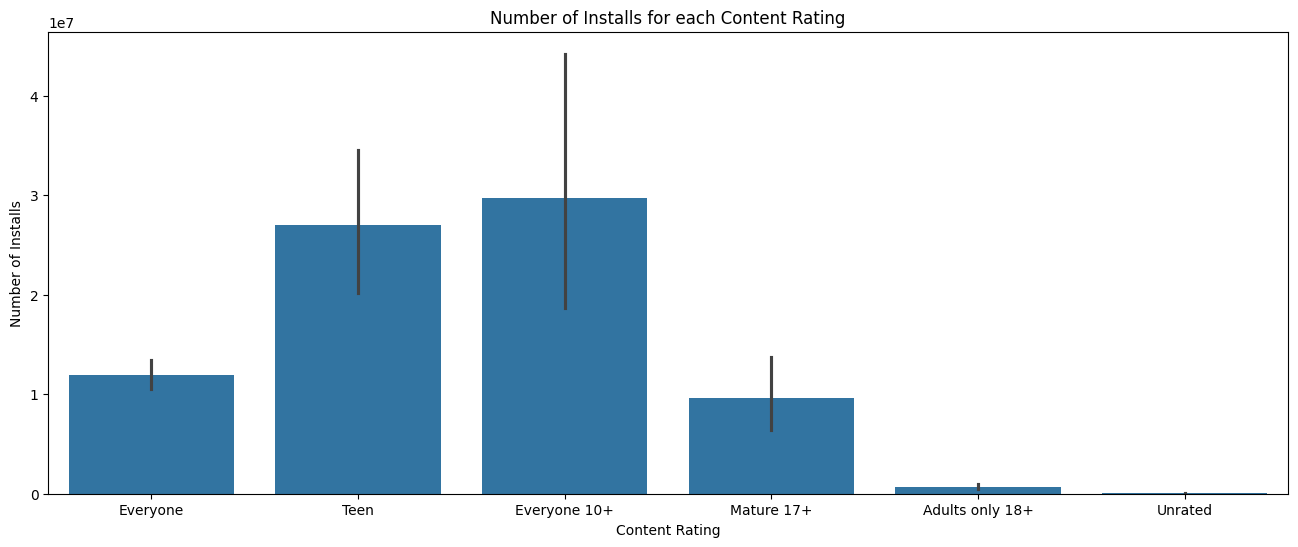

In [83]:
#  plot the bar plot of content rating vs installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the
plt.xlabel('Content Rating')  # add x-axis label
plt.ylabel('Number of Installs')  # add y-axis label
plt.title('Number of Installs for each Content Rating')  # add the title for the plot
plt.show()

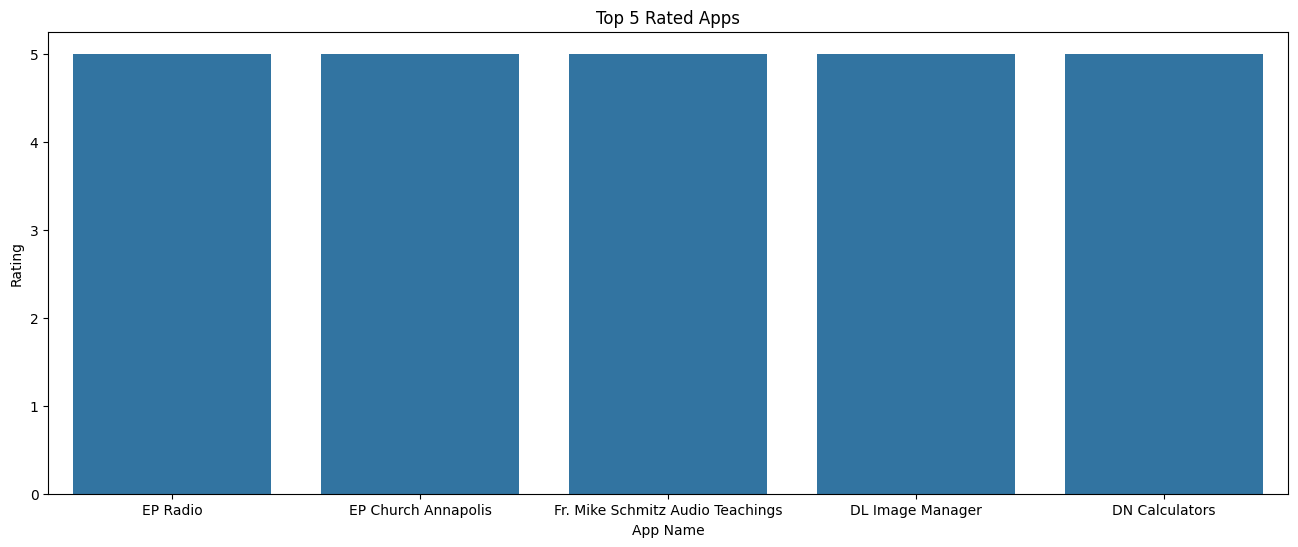

In [84]:
# plot the top 5 rated apps 
plt.figure(figsize=(16, 6)) # make figure size
top_5_rated_apps = df.sort_values(by='Rating', ascending=False).head(5) # get the top 5 rated apps
sns.barplot(x='App', y='Rating', data=top_5_rated_apps) # plot the bar plot
plt.xlabel('App Name')  # add x-axis label      
plt.ylabel('Rating')  # add y-axis label
plt.title('Top 5 Rated Apps')  # add title
plt.show()

In [85]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
8014,Morse Player,FAMILY,5.0,12,2516582.4,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up,2.400000,Low
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1258291.2,10,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,1.200000,Very low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,Very low
9056,Santa's Monster Shootout DX,GAME,5.0,4,34603008.0,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.000000,Low
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,Low


# ✅ Solution to Business Objective

From the EDA on the Google Play Store dataset, we can suggest the following to achieve business objectives:

Target Popular Categories – Apps in categories like  Games, Communication, Social, productivity  and Tools dominate in terms of installs and reviews, making them ideal for maximizing reach.

Adopt a Free-First Strategy – Free apps consistently outperform paid apps in downloads. Developers should launch apps as free with monetization models like ads or in-app purchases.

Focus on Ratings and Reviews – Higher ratings are strongly linked with more installs. Continuous improvement, bug fixes, and active user engagement are crucial.

Optimize App Size and Updates – Lightweight apps and those updated regularly tend to achieve better installs and user retention.

Explore Niche Paid Categories – Categories like  Family, Game, Tools  have a higher percentage of paid apps, suggesting opportunities for direct revenue through premium or subscription models.

# Conclusion
The analysis shows that app success on the Google Play Store is driven by category selection, free pricing strategy, quality (ratings and reviews), and consistent updates. Developers aiming for maximum installs should focus on popular free app categories, while revenue-focused strategies can target niche paid categories. By aligning development and marketing efforts with these insights, businesses can achieve both user growth and profitability